In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_absolute_error


In [3]:
df= pd.read_csv('testdata.csv')
df.head()

,Sl. No,Temperature,Preasure
0,1,2,0.0002
1,2,20,0.0012
2,3,40,0.0060
3,4,60,0.0300
4,5,80,0.0900


In [4]:
temp=df.iloc[:,1:2].values
pres=df.iloc[:,2].values

In [5]:
linreg=LinearRegression()
linreg.fit(temp,pres)

LinearRegression()

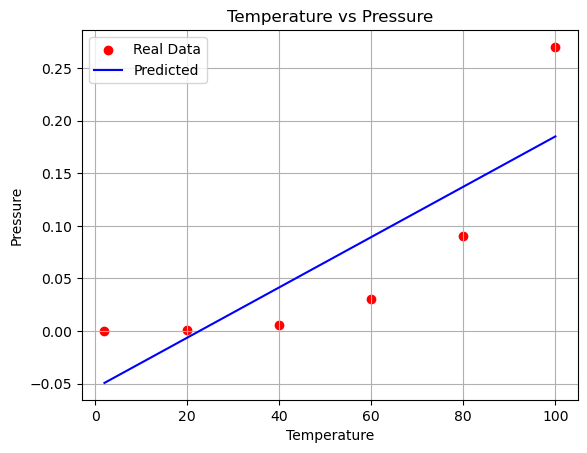

In [6]:
predicted=linreg.predict(temp)
plt.scatter(temp,pres,color='red')
plt.plot(temp,predicted,color='blue')
plt.title('Temperature vs Pressure')
plt.xlabel('Temperature')
plt.ylabel('Pressure')
plt.legend(['Real Data','Predicted'])
plt.grid()
plt.show()

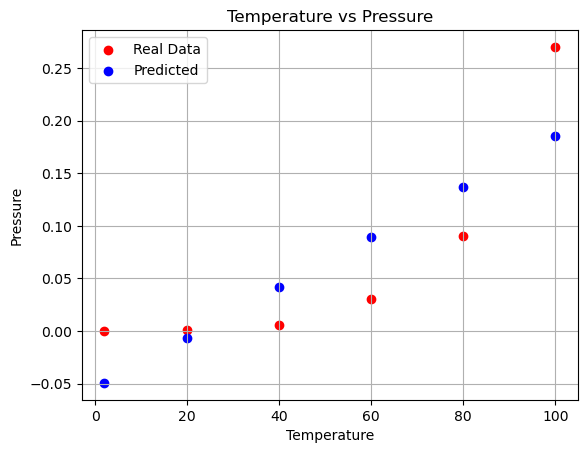

In [7]:
#predict the output
predicted = linreg.predict(temp)
#plot the results
plt.scatter(temp, pres, color='red')
plt.scatter(temp, predicted, color='blue')
plt.title('Temperature vs Pressure')
plt.xlabel('Temperature')
plt.ylabel('Pressure')
plt.legend(['Real Data', 'Predicted'])
plt.grid()
plt.show()

In [8]:
# Display the coefficients and intercept
print(f"Coefficient (slope): {linreg.coef_[0]}")
print(f"Intercept: {linreg.intercept_}")


Coefficient (slope): 0.0023902890739833406
Intercept: -0.05407788339049481


In [9]:


# Compute Mean Absolute Error (MAE)
mae = mean_absolute_error(pres, predicted)
print(f"Mean Absolute Error (MAE): {mae}")



Mean Absolute Error (MAE): 0.047339461048505636


In [10]:
#predict the output for new given data ie given temperature is 30

given_temperature = np.array([[30]])
predicted_pressure = linreg.predict(given_temperature)
print(f"Predicted pressure for the given temperature {given_temperature[0][0]}: {predicted_pressure[0]}")


Predicted pressure for the given temperature 30: 0.017630788829005414


In [11]:


# Using the coefficients and intercept to predict the pressure for a temperature of 30

predicted_pressure_compute =  linreg.coef_[0] * given_temperature+ linreg.intercept_
print(f"predicted pressure computed using coefficient and intercept: {predicted_pressure_compute}")

predicted pressure computed using coefficient and intercept: [[0.01763079]]


In [12]:
# Display the coefficients and intercept
print(f"Coefficients: {linreg.coef_}")
print(f"Intercept: {linreg.intercept_}")

Coefficients: [0.00239029]
Intercept: -0.05407788339049481


**BOSTON HOUSING DATASET**


In [13]:
from sklearn.model_selection import train_test_split


In [14]:
dataf=pd.read_csv('housing.csv')
dataf.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [15]:
X = dataf.iloc[:, :-1].values  # All columns except the last one
y = dataf.iloc[:, -1].values   # The last column as the target


In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [17]:
from sklearn.preprocessing import LabelEncoder

# Encode the target variable
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Fit the model with the encoded target variable
linreg = LinearRegression()
linreg.fit(X_train, y_train_encoded)

LinearRegression()

In [18]:
print(f"Coefficients: {linreg.coef_}")
print(f"Intercept: {linreg.intercept_}")

Coefficients: [-5.54956448e-01 -3.67781401e-01  4.71537921e-03  1.60868292e-04
  4.27041130e-04 -3.29035912e-04 -4.32566937e-04 -7.86846575e-02
 -1.14848272e-07]
Intercept: -51.86994839889177


In [19]:
# Example input with 9 features (replace with actual values)
new_input = np.array([[-122.23, 37.88, 41.0, 880.0, 129.0, 322.0, 126.0, 8.3252, 452600.0]])

# Predict using the model
new_prediction = linreg.predict(new_input)
print(f"Predicted value: {new_prediction[0]}")

Predicted value: 1.553302857868971


In [20]:
computed_pressure = linreg.coef_[0] * 40 + linreg.intercept_
print(f"Computed pressure using coefficients and intercept: {computed_pressure}")

Computed pressure using coefficients and intercept: -74.06820631512647


In [21]:
from sklearn.impute import SimpleImputer

# Impute missing values in X_train and X_test
imputer = SimpleImputer(strategy='mean')  # Replace 'mean' with 'median' or other strategies if needed
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# Refit the model with the imputed data
linreg.fit(X_train, y_train_encoded)

# Predict on the test set
y_pred = linreg.predict(X_test)

# Compute Mean Squared Error (MSE)
mse = mean_squared_error(y_test_encoded, y_pred)
print(f"Mean Squared Error (MSE): {mse}")

Mean Squared Error (MSE): 1.7760442814914348


In [22]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Predict on the test set
y_pred = linreg.predict(X_test)

# Compute Mean Squared Error (MSE)
mse = mean_squared_error(y_test_encoded, y_pred)
print(f"Mean Squared Error (MSE): {mse}")

# Compute Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")

# Compute Relative Mean Squared Error (RelMSE)
rel_mse = mse / np.mean(y_test_encoded**2)
print(f"Relative Mean Squared Error (RelMSE): {rel_mse}")

# Compute Coefficient of Variation (CV)
cv = rmse / np.mean(y_test_encoded)
print(f"Coefficient of Variation (CV): {cv}")

Mean Squared Error (MSE): 1.7760442814914348
Root Mean Squared Error (RMSE): 1.3326831136813562
Relative Mean Squared Error (RelMSE): 0.5089913075532243
Coefficient of Variation (CV): 1.1176992875409668
